In [ ]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, SimpleRNN, LSTM
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt



In [ ]:
!pip install firebase-admin

In [ ]:
import firebase_admin
from firebase_admin import credentials, storage
import os
from PIL import Image

In [ ]:
from google.colab import drive
drive.mount('/content/drive') # Used to store JSON key

Mounted at /content/drive


In [ ]:
# Initialize Firebase

json_path = '### Update with the path to your JSON key ###'

cred = credentials.Certificate(json_path)  # Update with the path to your JSON key
firebase_admin.initialize_app(cred, {'storageBucket': '### Project ID ###'})  # Update with your project ID
bucket = storage.bucket()

# Define Firebase folder paths
folders = ["pneumonia", "normal"]  # Update with your folder names

In [ ]:
# List all files in the specified folder
folder_path = 'normal/'
local_image_path = '/content/normal/'

os.makedirs(local_image_path, exist_ok=True)

blobs = bucket.list_blobs(prefix=folder_path)
normal_count = 0
print(f"Files in folder '{folder_path}':")
for blob in blobs:
    print(blob.name)
    # Extract filename from blob name and join with local directory path
    filename = os.path.basename(blob.name)  # Get filename from blob.name
    full_local_path = os.path.join(local_image_path, filename) # Concatenate local directory path and filename
    blob.download_to_filename(full_local_path) # Download to the specific file path
    normal_count += 1

Files in folder 'normal/':
normal/IM-0001-0001.jpeg
normal/IM-0003-0001.jpeg
normal/IM-0005-0001.jpeg
normal/IM-0006-0001.jpeg
normal/IM-0007-0001.jpeg
normal/IM-0009-0001.jpeg
normal/IM-0010-0001.jpeg
normal/IM-0011-0001-0001.jpeg
normal/IM-0011-0001-0002.jpeg
normal/IM-0011-0001.jpeg
normal/IM-0013-0001.jpeg
normal/IM-0015-0001.jpeg
normal/IM-0016-0001.jpeg
normal/IM-0017-0001.jpeg
normal/IM-0019-0001.jpeg
normal/IM-0021-0001.jpeg
normal/IM-0022-0001.jpeg
normal/IM-0023-0001.jpeg
normal/IM-0025-0001.jpeg
normal/IM-0027-0001.jpeg
normal/IM-0028-0001.jpeg
normal/IM-0029-0001.jpeg
normal/IM-0030-0001.jpeg
normal/IM-0031-0001.jpeg
normal/IM-0033-0001-0001.jpeg
normal/IM-0033-0001-0002.jpeg
normal/IM-0033-0001.jpeg
normal/IM-0035-0001.jpeg
normal/IM-0036-0001.jpeg
normal/IM-0037-0001.jpeg
normal/IM-0039-0001.jpeg
normal/IM-0041-0001.jpeg
normal/IM-0043-0001.jpeg
normal/IM-0045-0001.jpeg
normal/IM-0046-0001.jpeg
normal/IM-0049-0001.jpeg
normal/IM-0050-0001.jpeg
normal/IM-0059-0001.jpeg
nor

In [ ]:
# List all files in the specified folder
folder_path = 'pneumonia/'
local_image_path = '/content/pneumonia/'

os.makedirs(local_image_path, exist_ok=True)

blobs = bucket.list_blobs(prefix=folder_path)
print(f"Files in folder '{folder_path}':")
pneumonia_count = 0
for blob in blobs:
    print(blob.name)
    # Extract filename from blob name and join with local directory path
    filename = os.path.basename(blob.name)  # Get filename from blob.name
    full_local_path = os.path.join(local_image_path, filename) # Concatenate local directory path and filename
    blob.download_to_filename(full_local_path) # Download to the specific file path
    pneumonia_count += 1

Files in folder 'pneumonia/':
pneumonia/.DS_Store
pneumonia/person1000_bacteria_2931.jpeg
pneumonia/person1000_virus_1681.jpeg
pneumonia/person1001_bacteria_2932.jpeg
pneumonia/person1002_bacteria_2933.jpeg
pneumonia/person1003_bacteria_2934.jpeg
pneumonia/person1003_virus_1685.jpeg
pneumonia/person1004_bacteria_2935.jpeg
pneumonia/person1004_virus_1686.jpeg
pneumonia/person1005_bacteria_2936.jpeg
pneumonia/person1005_virus_1688.jpeg
pneumonia/person1006_bacteria_2937.jpeg
pneumonia/person1007_bacteria_2938.jpeg
pneumonia/person1007_virus_1690.jpeg
pneumonia/person1008_bacteria_2939.jpeg
pneumonia/person1008_virus_1691.jpeg
pneumonia/person1009_virus_1694.jpeg
pneumonia/person100_bacteria_475.jpeg
pneumonia/person100_bacteria_477.jpeg
pneumonia/person100_bacteria_478.jpeg
pneumonia/person100_bacteria_479.jpeg
pneumonia/person100_bacteria_480.jpeg
pneumonia/person100_bacteria_481.jpeg
pneumonia/person100_bacteria_482.jpeg
pneumonia/person100_virus_184.jpeg
pneumonia/person1010_bacteria_

In [ ]:
# Access images to find their size
import cv2  # OpenCV for image processing
import numpy as np
local_paths = {'pneumonia': '/content/pneumonia/', 'normal': '/content/normal/'}

# Function to check image blurriness
def is_blurry(image, threshold=100):
    laplacian_var = cv2.Laplacian(np.array(image), cv2.CV_64F).var()  # Calculate the variance of Laplacian
    return laplacian_var < threshold

# Access images to find their size and blurriness
for folder, local_image_path in local_paths.items():
    print(f"\nImage details in '{folder}' folder:")
    for filename in os.listdir(local_image_path):
        # Skip hidden files
        if filename.startswith('.'):
            continue
        image_path = os.path.join(local_image_path, filename)
        with Image.open(image_path) as img:
          # Get image width and height
          width, height = img.size
          # Check for image blurriness
          blurry = is_blurry(img)
          if(blurry):
            blurry_or_not = "Blurry"
          else:
            blurry_or_not = "Not Blurry"
        print(f"{filename}: {width}x{height} pixels, {blurry_or_not}")

Streaming output truncated to the last 5000 lines.
person1702_bacteria_4511.jpeg: 1064x776 pixels, Not Blurry
person414_bacteria_1835.jpeg: 1534x1264 pixels, Blurry
person1328_bacteria_3376.jpeg: 1072x584 pixels, Not Blurry
person1438_bacteria_3715.jpeg: 944x632 pixels, Not Blurry
person1176_virus_1997.jpeg: 1080x752 pixels, Not Blurry
person489_bacteria_2065.jpeg: 1032x600 pixels, Not Blurry
person151_virus_302.jpeg: 1264x704 pixels, Not Blurry
person883_bacteria_2807.jpeg: 1008x584 pixels, Not Blurry
person253_bacteria_1156.jpeg: 856x544 pixels, Not Blurry
person470_bacteria_2003.jpeg: 1534x1064 pixels, Blurry
person1494_bacteria_3901.jpeg: 1080x728 pixels, Not Blurry
person124_bacteria_590.jpeg: 992x696 pixels, Not Blurry
person1537_virus_2674.jpeg: 1456x1312 pixels, Not Blurry
person1949_bacteria_4880.jpeg: 1416x944 pixels, Not Blurry
person1865_bacteria_4739.jpeg: 1824x1384 pixels, Not Blurry
person59_bacteria_284.jpeg: 1122x639 pixels, Blurry
person1186_bacteria_3134.jpeg: 1666x1

In [ ]:
#Class Imbalances

# Get the number of images in each class
normal_count = len(os.listdir('/content/normal/'))
pneumonia_count = len(os.listdir('/content/pneumonia/'))

print("\nClass Distribution Summary:")
print(f"Class Normal: {normal_count} images")
print(f"Class Pneumonia: {pneumonia_count} images")

# Check for class imbalance
total_images = pneumonia_count + normal_count
normal_percentage = (normal_count / total_images) * 100
pneumonia_percentage = (pneumonia_count / total_images) * 100
print(f"Class Normal accounts for {normal_percentage:.2f}% of the dataset")
print(f"Class Pneumonia accounts for {pneumonia_percentage:.2f}% of the dataset")


Class Distribution Summary:
Class Normal: 1583 images
Class Pneumonia: 4274 images
Class Normal accounts for 27.03% of the dataset
Class Pneumonia accounts for 72.97% of the dataset


In [ ]:
# Handle class imbalances by undersampling larger class
import random
import shutil
# Create folder for undersampled pneumonia images
os.makedirs('/content/undersampled_pneumonia/', exist_ok=True)

# Randomly select a subset of pneumonia images
undersampled_pneumonia_images = random.sample(os.listdir('/content/pneumonia/'), normal_count)

# Copy the undersampled pneumonia images to the new directory
for img in undersampled_pneumonia_images:
  shutil.copy(os.path.join('/content/pneumonia/', img), '/content/undersampled_pneumonia/')

print(f"Undersampled pneumonia class to {normal_count} images.")

Undersampled pneumonia class to 1583 images.


In [ ]:
# Import necessary libraries for Vision Transformer (ViT)
import os
import random
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from PIL import Image
import torch
from transformers import ViTForImageClassification

# Define custom dataset for the images
class ChestXRayDataset(Dataset):
    def __init__(self, image_paths, transform=None):
        self.image_paths = image_paths
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert("RGB")
        label = 0 if "normal" in img_path else 1  # Assuming folder name indicates class
        if self.transform:
            image = self.transform(image)
        return image, label

# Image paths for dataset creation
normal_images = [os.path.join('/content/normal/', img) for img in os.listdir('/content/normal/')]
pneumonia_images = [os.path.join('/content/undersampled_pneumonia/', img) for img in os.listdir('/content/undersampled_pneumonia/')]
all_images = normal_images + pneumonia_images

# Splitting the data into train (60%), validation (20%), and test (20%) sets
train_images, temp_images = train_test_split(all_images, test_size=0.4, random_state=42, stratify=[0 if "normal" in img else 1 for img in all_images])
val_images, test_images = train_test_split(temp_images, test_size=0.5, random_state=42, stratify=[0 if "normal" in img else 1 for img in temp_images])

# Data transforms for ViT
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

# Creating datasets and dataloaders
train_dataset = ChestXRayDataset(train_images, transform=transform)
val_dataset = ChestXRayDataset(val_images, transform=transform)
test_dataset = ChestXRayDataset(test_images, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False, num_workers=2)


Using ViTForImageClassification model, which is pretrained on ImageNet dataset. Adapted this model for binary classification task (num_labels=2).

Uses GPU(CUDA) if possible, otherwise runs on CPU.

AdamW Optimizer:
- AdamW is generally well-suited for transformer-based models like ViT due to its ability to decouple weight decay and learning rate. This helps improve generalization.
In combination with a moderate learning rate like 1e-4, it tends to perform well for fine-tuning tasks.

CrossEntropyLoss used for classification, very effective for binary classification.

Model Training:

- forward pass = input images going thru model to get outputs, which have the predictions before applying softmax

- then, difference between predicted outputs and actual labels is calculated with CrossEntropyLoss

- backward pass:
    
    - loss.backward calculates gradients for each parameter
    - optimizer.zero_grad() resets gradients from previous iteration
    - torch.nn.utils.clip_grad_norm_() caps gradients to a max value of 1.0
    - optimizer.step() updates model parameters based on computed gradients.

Validation:

- same forward pass as model training
- evaluates model on the validation set without updating weights
- logs training and validation losses, model accuracy

Gradients are disabled with torch.no_grad() since gradients are not needed during inference


# Loading the Model

In [ ]:
import torch
from transformers import ViTForImageClassification

model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224', num_labels=2, ignore_mismatched_sizes=True)
# Load the model state dict
model.load_state_dict(torch.load('vit_model.pth', map_location=torch.device('cpu')))
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

model.eval()  # Set the model to evaluation mode if you are using it for inference

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/69.7k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([2]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([2, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-14-07aad5f96bf4>:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. Thi

ViTForImageClassification(
  (vit): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTSdpaAttention(
            (attention): ViTSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_fe

In [ ]:
# Optimizer and loss function
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-4)
criterion = torch.nn.CrossEntropyLoss()

# Model Metrics

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

# Set the model to evaluation mode
model.eval()

# Initialize variables to track performance metrics
correct = 0
total = 0
test_loss = 0

all_labels = []
all_predictions = []

# Disable gradient calculation for testing
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model(pixel_values=images).logits
        test_loss += criterion(outputs, labels).item()  # Accumulate loss

        # Get predicted class
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        #store predictions and labels for metrics analysis
        all_predictions.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Calculate and print test accuracy and loss
test_loss /= len(test_loader)  # Average test loss
test_accuracy = 100 * correct / total  # Test accuracy percentage
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%')


Test Loss: 0.1663, Test Accuracy: 96.53%


In [ ]:
# Calculate and display additional metrics
print("Classification Report:")
print(classification_report(all_labels, all_predictions, target_names=["Normal", "Pneumonia"]))

Classification Report:
              precision    recall  f1-score   support

      Normal       0.94      0.99      0.97       317
   Pneumonia       0.99      0.94      0.96       317

    accuracy                           0.97       634
   macro avg       0.97      0.97      0.97       634
weighted avg       0.97      0.97      0.97       634



In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
# Calculate and display ROC-AUC score
roc_auc = roc_auc_score(all_labels, all_predictions)
print(f'ROC-AUC Score: {roc_auc:.4f}')

ROC-AUC Score: 0.9653


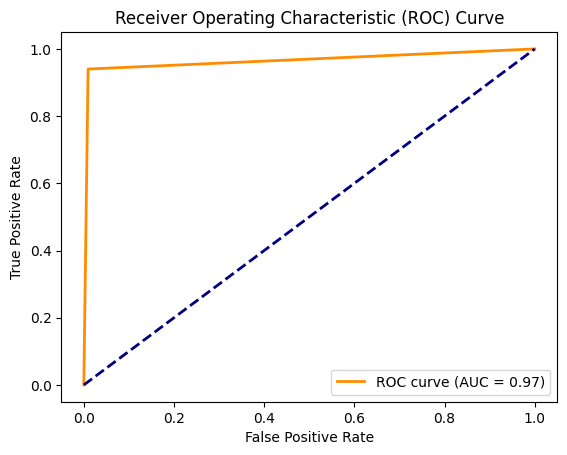

In [ ]:
fpr, tpr, thresholds = roc_curve(all_labels, all_predictions)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# GRAD-CAM Analysis for Visualization

In [ ]:
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Register hooks to capture gradients and activations
gradients = None
activations = None

def backward_hook(module, grad_input, grad_output):
    global gradients
    gradients = grad_output[0]

def forward_hook(module, input, output):
    global activations
    activations = output

# Step 2: Register hooks on the target layer (last self-attention layer)
# Assuming 'model' is loaded as per the provided description
target_layer = model.vit.encoder.layer[-1]  # Targeting the last ViT layer
target_layer.register_forward_hook(forward_hook)
target_layer.register_backward_hook(backward_hook)



In [ ]:
# Step 3: Define a function to apply Grad-CAM on test images
def apply_grad_cam(model, test_images, target_class_idx):
    global gradients, activations

    model.eval()  # Set model to evaluation mode
    images = test_images  # Assuming test_images is a list of tensors
    images.requires_grad = True  # Enable gradients for input

    # Forward pass
    outputs = model(images)

    # Access logits from the outputs if it is an ImageClassifierOutput object
    if hasattr(outputs, 'logits'):
        outputs = outputs.logits  # Extract the logits tensor

    # Ensure outputs is now a tensor
    assert isinstance(outputs, torch.Tensor), "Expected outputs to be a tensor after extracting logits"
    assert target_class_idx < outputs.shape[1], "Invalid target class index"

    # Proceed with extracting scores for the target class
    target_class_scores = outputs[:, target_class_idx]  # Focus on target class
    print(f"Target class scores shape: {target_class_scores.shape}")  # Add this for debugging


    # Backward pass
    model.zero_grad()
    target_class_scores.backward(torch.ones_like(target_class_scores))  # Compute gradients

    # Extract the tensor from the activations tuple
    if isinstance(activations, tuple):
        activations = activations[0]  # Use the first element of the tuple

    # Ensure activations is a tensor before proceeding
    assert isinstance(activations, torch.Tensor), "Expected activations to be a tensor"

   # Compute Grad-CAM heatmap with adaptation for Vision Transformer outputs
    with torch.no_grad():
        # Global average pooling over the token dimension (axis 1)
        weights = torch.mean(gradients, dim=1)  # Shape: [batch_size, embedding_dim]

        # Weighted sum over activations (assumes activations have the same shape as gradients)
        grad_cam_map = torch.einsum('bc,bnc->bn', weights, activations)  # Sum across embedding dimension
        grad_cam_map = torch.nn.functional.relu(grad_cam_map)  # Apply ReLU

        # Check the size of grad_cam_map before reshaping
        print(f"grad_cam_map shape before reshaping: {grad_cam_map.shape}")

        # Remove the class token (assuming it's the first token)
        grad_cam_map = grad_cam_map[:, 1:]  # Shape: [batch_size, 196]


        # Calculate grid size if applicable
        num_patches = grad_cam_map.shape[1]
        grid_size = int(num_patches ** 0.5)  # Only valid if num_patches is a perfect square

        if grid_size * grid_size == num_patches:
            # Reshape only if the grid size is valid
            grad_cam_map = grad_cam_map.reshape(-1, grid_size, grid_size)
        else:
            # Handle cases where num_patches is not a perfect square (e.g., by skipping reshaping)
            print(f"Warning: grad_cam_map cannot be reshaped to a square grid. num_patches = {num_patches}")

    # Normalize and resize the heatmap
    heatmaps = []
    for heatmap in grad_cam_map:
        heatmap = heatmap.cpu().numpy()
        heatmap = cv2.resize(heatmap, (images.shape[2], images.shape[3]))
        heatmap = (heatmap - heatmap.min()) / (heatmap.max() - heatmap.min())  # Normalize
        heatmaps.append(heatmap)

    return heatmaps

def overlay_heatmap_on_images(images, heatmaps, alpha=0.5):
    overlayed_images = []
    image_titles = test_images[0:16]
    i = 0
    for img, heatmap in zip(images, heatmaps):
        # Convert PyTorch tensor to NumPy array and move to CPU if necessary
        if isinstance(img, torch.Tensor):
            img = img.detach().cpu().numpy()

        # Ensure image is in the correct format for OpenCV (e.g., shape [H, W, C] and uint8)
        img = np.transpose(img, (1, 2, 0))  # Assuming the tensor is [C, H, W]
        img = (img * 255).astype(np.uint8)  # Scale image values to 0-255

        # Apply the heatmap
        heatmap = cv2.applyColorMap(np.uint8(255 * heatmap), cv2.COLORMAP_JET)
        overlayed_image = cv2.addWeighted(img, 1 - alpha, heatmap, alpha, 0)
        overlayed_images.append(overlayed_image)

        # Display the image
        plt.imshow(overlayed_image)
        plt.axis('off')
        plt.colorbar()
        plt.title(image_titles[i])
        plt.show()
        i+=1

    return overlayed_images


# Example usage assuming 'test_images' is defined and 'target_class_idx' is specified
# heatmaps = apply_grad_cam(model, test_images, target_class_idx=1)  # Replace with actual index for Pneumonia/Normal
# overlayed_images = overlay_heatmap_on_images(original_images, heatmaps)  # Use original test image data
"Grad-CAM implementation completed."


'Grad-CAM implementation completed.'

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1827: FutureWarning: Using non-full backward hooks on a Module that does not return a single Tensor or a tuple of Tensors is deprecated and will be removed in future versions. This hook will be missing some of the grad_output. Please use register_full_backward_hook to get the documented behavior.
  self._maybe_warn_non_full_backward_hook(args, result, grad_fn)


Target class scores shape: torch.Size([16])
grad_cam_map shape before reshaping: torch.Size([16, 197])


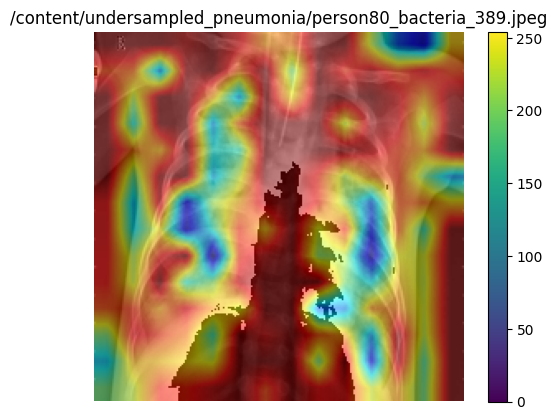

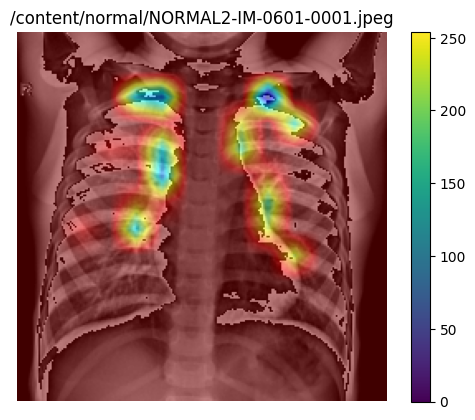

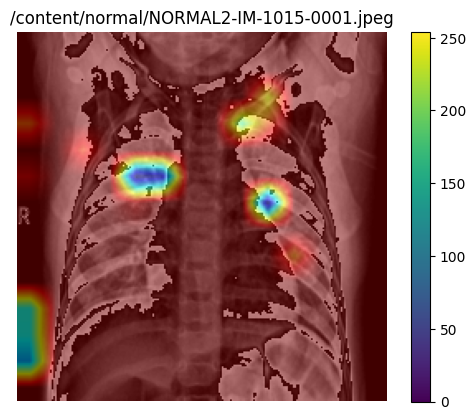

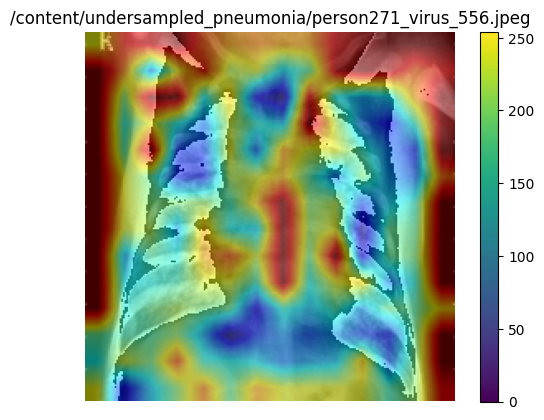

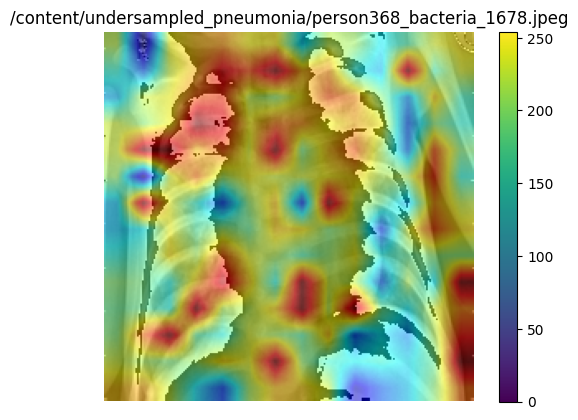

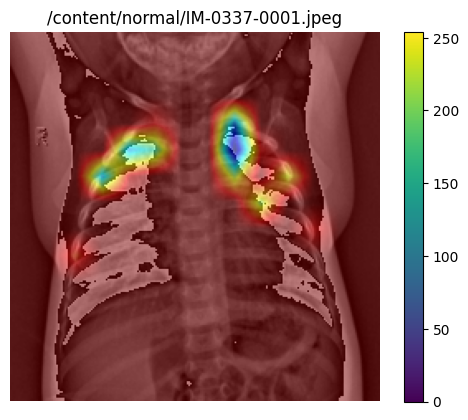

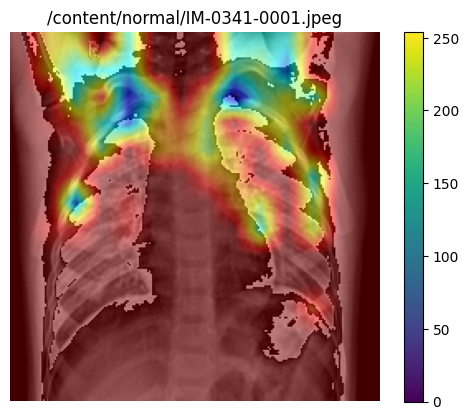

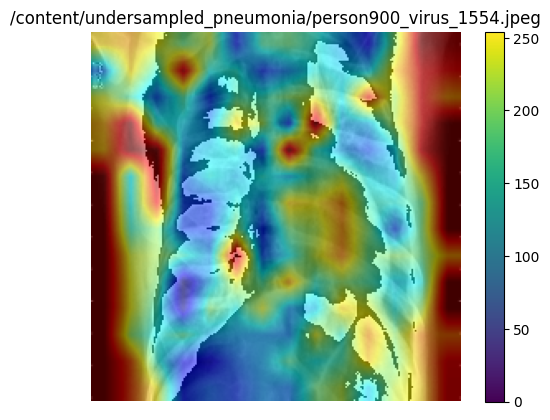

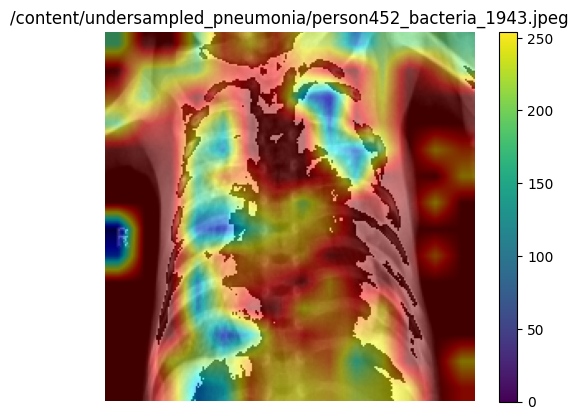

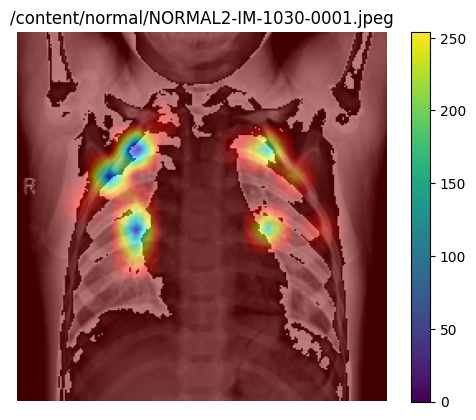

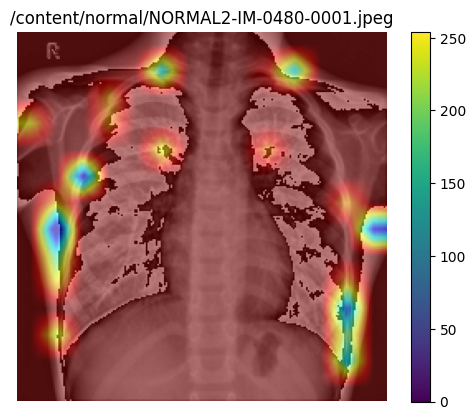

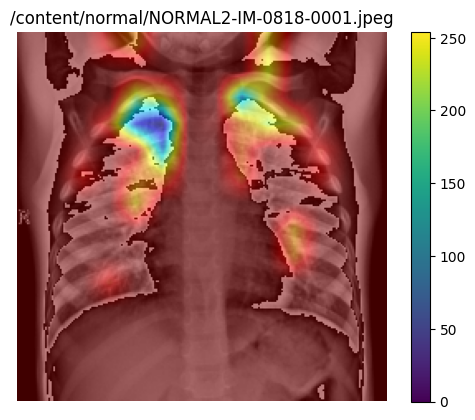

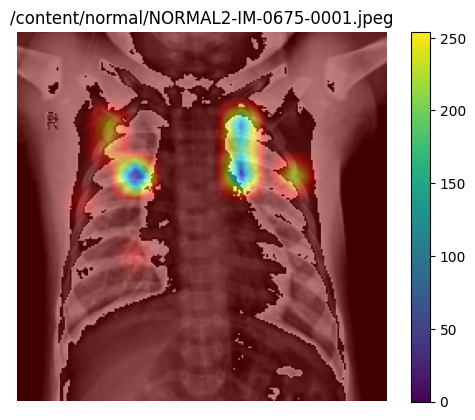

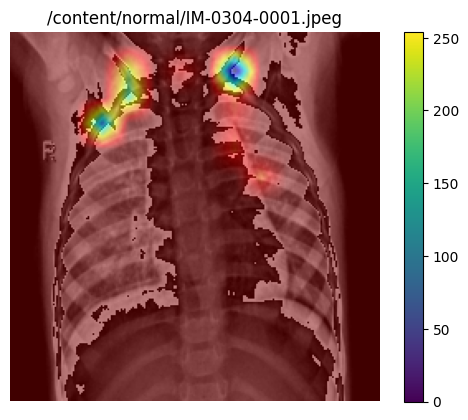

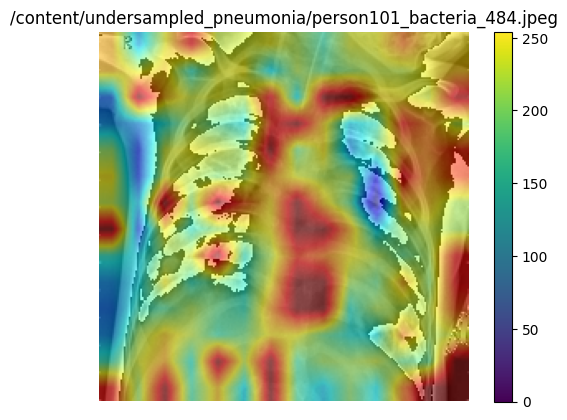

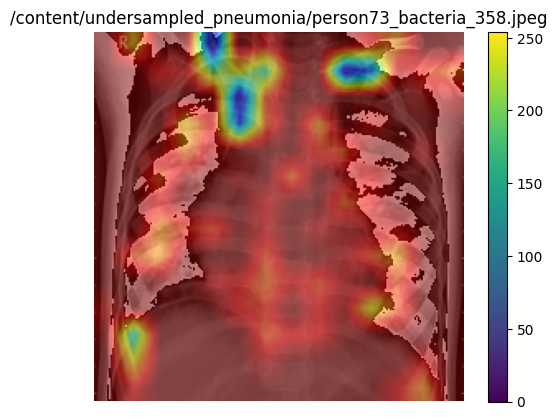

In [ ]:
sample_images, sample_labels = next(iter(test_loader))  # Retrieve a batch of images and labels AKA first 16 images from test set
sample_images = sample_images.to(device)  # Move images to the same device
sample_images.requires_grad = True

target_class_idx = 1  # Use the index for Pneumonia = 1
heatmaps = apply_grad_cam(model, sample_images, target_class_idx)
overlayed_images = overlay_heatmap_on_images(sample_images, heatmaps)
